In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# 1. Problem Statement :

target variable : Premium

independent variables :

    1. Sr. No.
    2. Name
    3. Age(yrs)
    4. Gender
    5. Height(cm)
    6. Weight(kg)
    7. Health Insurance cover

  To build a machine learning mode which can predict the premium.

# 2. Data Gathering :

In [2]:
df = pd.read_excel('height_weight_data.xlsx')
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,1,krushna,0.250000,male,61.4,6.4,500000,7015
1,2,pavan,0.333333,male,63.9,7.0,500000,7015
2,3,ketan,0.416667,male,65.9,7.5,500000,7015
3,4,akash,0.500000,male,67.6,7.9,500000,7015
4,5,syam,0.583333,male,69.2,8.3,500000,7015
...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,female,155.0,NaN,10000000,111340
1672,1673,mira,82.000000,female,155.0,65.0,10000000,111340
1673,1674,radha,83.000000,female,155.0,65.0,10000000,111340
1674,1675,lakshmi,84.000000,female,155.0,65.0,10000000,111340


# 3. EDA (Exploratoray Data Analysis) :

1. Checking Null Values :

In [3]:
df.isna().sum()

,0
Sr.no,0
Name,0
Age(yrs),0
Gender,0
Height (cm),7
Weight(kg),6
Health Insurance cover,0
Premium,0


In [4]:
# we are having two columns Height (cm) and Weight(kg) which are having null values. We will handle this in feature engineering step.

2. We'll check the datatypes of each column :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   object 
 4   Height (cm)             1669 non-null   float64
 5   Weight(kg)              1670 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 104.9+ KB


In [6]:
# df['Gender'] feature is in object form, so we'll convert this feature into numerical form using replace function.

3. Checking Outliers in data :

In [7]:
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,1,krushna,0.250000,male,61.4,6.4,500000,7015
1,2,pavan,0.333333,male,63.9,7.0,500000,7015
2,3,ketan,0.416667,male,65.9,7.5,500000,7015
3,4,akash,0.500000,male,67.6,7.9,500000,7015
4,5,syam,0.583333,male,69.2,8.3,500000,7015
...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,female,155.0,NaN,10000000,111340
1672,1673,mira,82.000000,female,155.0,65.0,10000000,111340
1673,1674,radha,83.000000,female,155.0,65.0,10000000,111340
1674,1675,lakshmi,84.000000,female,155.0,65.0,10000000,111340


In [8]:
df['Age(yrs)']

,Age(yrs)
0,0.250000
1,0.333333
2,0.416667
3,0.500000
4,0.583333
...,...
1671,81.000000
1672,82.000000
1673,83.000000
1674,84.000000


In [9]:
df.describe()

,Sr.no,Age(yrs),Height (cm),Weight(kg),Health Insurance cover,Premium
count,1676.000000,1676.000000,1669.000000,1670.000000,1.676000e+03,1676.000000
mean,838.500000,39.296241,146.506153,55.261635,3.414976e+06,30299.919451
std,483.963842,26.338582,31.425153,22.966762,3.170480e+06,25308.839018
min,1.000000,0.250000,56.000000,4.800000,5.000000e+05,7015.000000
25%,419.750000,16.000000,153.800000,47.000000,1.000000e+06,14100.000000
50%,838.500000,39.000000,155.000000,65.000000,2.000000e+06,18225.000000
75%,1257.250000,62.000000,165.000000,68.000000,5.000000e+06,41410.000000
max,1676.000000,85.000000,177.000000,88.000000,1.000000e+07,111340.000000


In [10]:
# Detecting outliers in df['Age(yrs)'] using IQR method :

q3 = df['Age(yrs)'].quantile(0.75)
q1 = df['Age(yrs)'].quantile(0.25)
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(upper_limit)
print(lower_limit)

131.0
-53.0


<Axes: xlabel='Age(yrs)'>

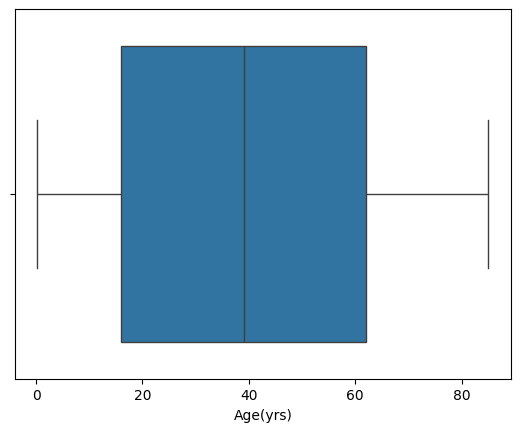

In [11]:
# Detecting outliers in df['Age(yrs)'] using boxplot method :

sns.boxplot(x=df['Age(yrs)'])

In [12]:
# we don't have any outliers in df['Age(yrs)']

In [13]:
df['Height (cm)']

,Height (cm)
0,61.4
1,63.9
2,65.9
3,67.6
4,69.2
...,...
1671,155.0
1672,155.0
1673,155.0
1674,155.0


<Axes: xlabel='Height (cm)'>

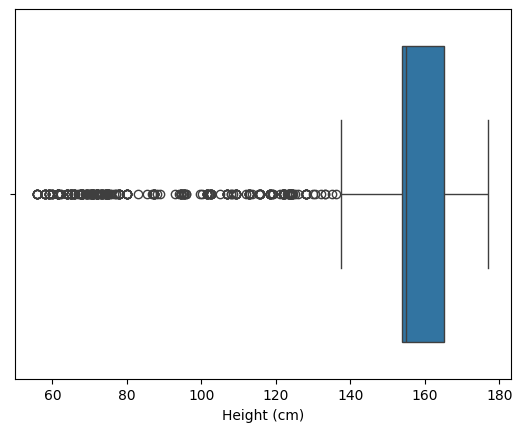

In [14]:
sns.boxplot(x=df['Height (cm)'])

<Axes: xlabel='Height (cm)', ylabel='Density'>

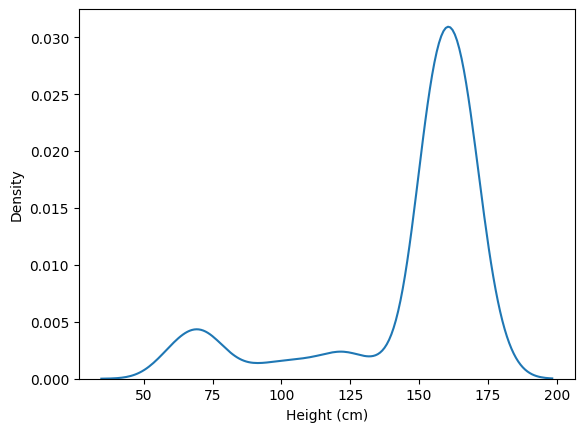

In [15]:
sns.kdeplot(df['Height (cm)'])

In [16]:
# we can see some outliers here in df['Height (cm)'] but we have to construct column/feature BMI so we'll handle it in feature Engineering

In [17]:
df['Weight(kg)']

,Weight(kg)
0,6.4
1,7.0
2,7.5
3,7.9
4,8.3
...,...
1671,NaN
1672,65.0
1673,65.0
1674,65.0


<Axes: xlabel='Weight(kg)'>

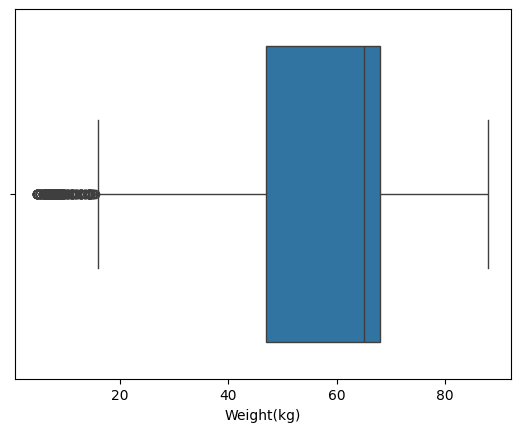

In [18]:
sns.boxplot(x=df['Weight(kg)'])

In [19]:
# we can see some outliers here in df['Weight(kg)'] but we have to construct column/feature BMI so we'll handle it in feature Engineering

In [20]:
df['Health Insurance cover']

,Health Insurance cover
0,500000
1,500000
2,500000
3,500000
4,500000
...,...
1671,10000000
1672,10000000
1673,10000000
1674,10000000


In [21]:
df['Health Insurance cover'].unique()

array([  500000,   750000,  1000000,  1500000,  2000000,  2500000,
        5000000,  7500000, 10000000])

In [22]:
# df['Health Insurance cover'] is a categorical column/feature so don't need to check outliers.

# 4. Feature Engineering :

In [33]:
# Handling Null values :

In [26]:
df['Height (cm)'].median()

155.0

In [27]:
df['Height (cm)'].fillna(155, inplace=True)

In [28]:
df['Height (cm)'].isna().sum()

np.int64(0)

In [29]:
df['Weight(kg)'].fillna(df['Weight(kg)'].median(), inplace=True)

In [31]:
df['Weight(kg)'].isna().sum()

np.int64(0)

In [32]:
df.isna().sum()

,0
Sr.no,0
Name,0
Age(yrs),0
Gender,0
Height (cm),0
Weight(kg),0
Health Insurance cover,0
Premium,0


In [24]:
# Performing encoding on df['Gender'] column :

In [34]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [35]:
df['Gender'].replace({'male':0, 'female':1}, inplace=True)

/tmp/ipython-input-2855755960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'male':0, 'female':1}, inplace=True)
/tmp/ipython-input-2855755960.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'male':0, 'female':1}, inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   int64  
 4   Height (cm)             1676 non-null   float64
 5   Weight(kg)              1676 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 104.9+ KB


In [ ]:
# Constructing new feature df['BMI'] with the help of df['Height (cm)'] and df['Weight(kg)'].

In [37]:
df['BMI'] = df['Weight(kg)'] / ((df['Height (cm)']/100)**2)

In [38]:
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium,BMI
0,1,krushna,0.250000,0,61.4,6.4,500000,7015,16.976307
1,2,pavan,0.333333,0,63.9,7.0,500000,7015,17.143375
2,3,ketan,0.416667,0,65.9,7.5,500000,7015,17.269924
3,4,akash,0.500000,0,67.6,7.9,500000,7015,17.287560
4,5,syam,0.583333,0,69.2,8.3,500000,7015,17.332687
...,...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,1,155.0,65.0,10000000,111340,27.055151
1672,1673,mira,82.000000,1,155.0,65.0,10000000,111340,27.055151
1673,1674,radha,83.000000,1,155.0,65.0,10000000,111340,27.055151
1674,1675,lakshmi,84.000000,1,155.0,65.0,10000000,111340,27.055151


In [39]:
df['BMI']

,BMI
0,16.976307
1,17.143375
2,17.269924
3,17.287560
4,17.332687
...,...
1671,27.055151
1672,27.055151
1673,27.055151
1674,27.055151


<Axes: xlabel='BMI'>

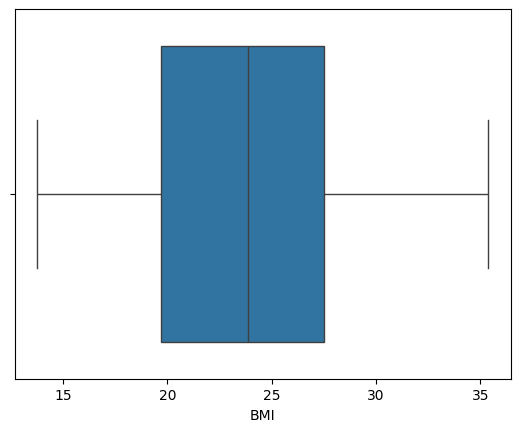

In [40]:
sns.boxplot(x=df['BMI'])

# 5. Feature Selection :

In [43]:
df.drop(['Sr.no', 'Name', 'Height (cm)', 'Weight(kg)'], axis=1, inplace=True)

In [46]:
df = df[['Age(yrs)', 'Gender',	'Health Insurance cover',	'BMI', 'Premium']]
df

,Age(yrs),Gender,Health Insurance cover,BMI,Premium
0,0.250000,0,500000,16.976307,7015
1,0.333333,0,500000,17.143375,7015
2,0.416667,0,500000,17.269924,7015
3,0.500000,0,500000,17.287560,7015
4,0.583333,0,500000,17.332687,7015
...,...,...,...,...,...
1671,81.000000,1,10000000,27.055151,111340
1672,82.000000,1,10000000,27.055151,111340
1673,83.000000,1,10000000,27.055151,111340
1674,84.000000,1,10000000,27.055151,111340


In [47]:
df.corr()

,Age(yrs),Gender,Health Insurance cover,BMI,Premium
Age(yrs),1.000000,-0.013704,0.001359,0.615258,0.804160
Gender,-0.013704,1.000000,0.000915,0.189033,-0.001906
Health Insurance cover,0.001359,0.000915,1.000000,0.012666,0.265755
BMI,0.615258,0.189033,0.012666,1.000000,0.248423
Premium,0.804160,-0.001906,0.265755,0.248423,1.000000


<Axes: >

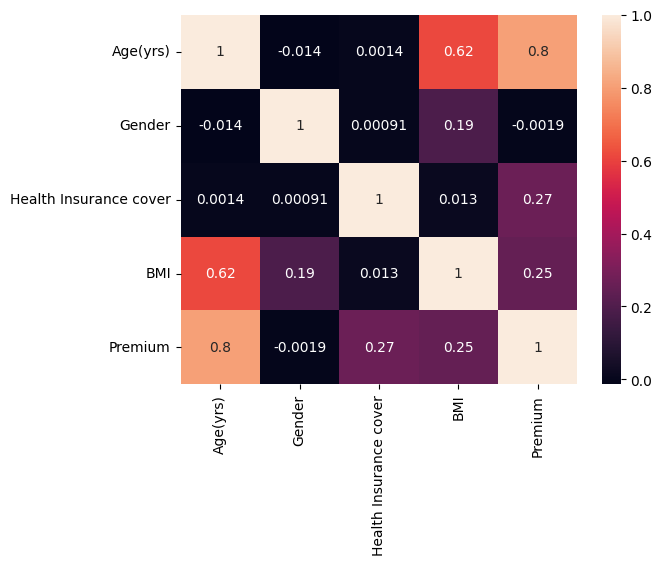

In [49]:
sns.heatmap(df.corr(), annot=True)

In [50]:
df

,Age(yrs),Gender,Health Insurance cover,BMI,Premium
0,0.250000,0,500000,16.976307,7015
1,0.333333,0,500000,17.143375,7015
2,0.416667,0,500000,17.269924,7015
3,0.500000,0,500000,17.287560,7015
4,0.583333,0,500000,17.332687,7015
...,...,...,...,...,...
1671,81.000000,1,10000000,27.055151,111340
1672,82.000000,1,10000000,27.055151,111340
1673,83.000000,1,10000000,27.055151,111340
1674,84.000000,1,10000000,27.055151,111340


# 6. Model Building :

In [51]:
x = df.drop('Premium', axis=1)
y = df['Premium']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

1. Linear Regression :

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred = lin_model.predict(x_test)
y_pred[:5]

array([21062.78205143, 22242.67384367, 10017.95325609, 46640.06806866,
       19345.70673152])

In [70]:
y_test[:5]

,Premium
979,17615
1336,18225
881,14100
258,40830
140,8075


In [71]:
# testing accuracy :

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_test, y_pred)
print('R2 Score :', r2)

Mean Squared Error : 98776334.24495766
Mean Absolute Error : 7743.364807557151
R2 Score : 0.8397586025916576


In [72]:
# training accuracy :
y_pred_train = lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_train, y_pred_train)
print('R2 Score :', r2)

Mean Squared Error : 115234635.99172696
Mean Absolute Error : 8141.694170594223
R2 Score : 0.8216433311768088


2. Decision Tree :

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [77]:
y_pred = dt_model.predict(x_test)
y_pred[:5]

array([17615., 18225., 14100., 40830.,  8075.])

In [78]:
y_test[:5]

,Premium
979,17615
1336,18225
881,14100
258,40830
140,8075


In [79]:
# testing accuracy :

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_test, y_pred)
print('R2 Score :', r2)

Mean Squared Error : 197624.25447316104
Mean Absolute Error : 28.031809145129223
R2 Score : 0.9996811061502542


In [81]:
# training accuracy :
y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_train, y_pred_train)
print('R2 Score :', r2)

Mean Squared Error : 0.0
Mean Absolute Error : 0.0
R2 Score : 1.0


# 3. Random Forest :

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [85]:
y_pred = rf_model.predict(x_test)
y_pred[:5]

array([17615. , 18225. , 14161.5, 39493.5,  8075. ])

In [86]:
y_test[:5]

,Premium
979,17615
1336,18225
881,14100
258,40830
140,8075


In [87]:
# testing accuracy :

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_test, y_pred)
print('R2 Score :', r2)

Mean Squared Error : 3044931.080596421
Mean Absolute Error : 272.65347912524834
R2 Score : 0.9950865859198784


In [88]:
# training accuracy :
y_pred_train = rf_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r2 = r2_score(y_train, y_pred_train)
print('R2 Score :', r2)

Mean Squared Error : 869805.3884271099
Mean Absolute Error : 138.20861040068192
R2 Score : 0.9986596066802921


# Testing Data :

In [96]:
age = 45
gender = 'male'
height = 155
weight = 65
health_insurance_cover = 2500000

In [98]:
def gender_encoder(gender):
  if gender=='male':
    return 0
  else:
    return 1

In [99]:
gender_encoder('female')

1

In [92]:
def bmi_constructor(height, weight):
  bmi = weight / ((height/100)**2)
  return bmi

In [93]:
bmi_constructor(155, 65)

27.055150884495315

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age(yrs)                1676 non-null   float64
 1   Gender                  1676 non-null   int64  
 2   Health Insurance cover  1676 non-null   int64  
 3   BMI                     1676 non-null   float64
 4   Premium                 1676 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 65.6 KB


In [107]:
test_df = pd.DataFrame({'Age(yrs)':[age], 'Gender':[gender_encoder(gender)], 'Health Insurance cover':[health_insurance_cover], 'BMI':[bmi_constructor(height, weight)]})

In [108]:
test_df

,Age(yrs),Gender,Health Insurance cover,BMI
0,45,0,2500000,27.055151


In [109]:
rf_model.predict(test_df)

array([17615.])

In [110]:
# Pickling a model : we are packing model here.

In [112]:
file = open('rf_model.pkl', 'wb')
pickle.dump(rf_model, file)
file.close()

In [113]:
# Unpickling a model : we are unpacking model here.

In [114]:
file = open('rf_model.pkl', 'rb')
rf_model_new = pickle.load(file)
file.close()

In [115]:
rf_model_new.predict(test_df)

array([17615.])